In [1]:

#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
abnb_6 = pd.read_csv('abnb_6_ForModeling.csv')

In [3]:
abnb_6.columns

Index(['Unnamed: 0', 'Listing #', 'host_is_superhost', 'accommodates',
       'bedrooms', 'bathrooms_number', 'beds', 'num_amenities',
       'number_of_reviews', 'instant_bookable', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room', 'income', 'price',
       'log_price'],
      dtype='object')

In [4]:
abnb_6 = abnb_6.drop('Unnamed: 0', axis=1)

In [18]:
X = abnb_6.drop(columns = ['log_price', 'price', 'Listing #', 'income'], axis=1)
y = abnb_6['log_price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [20]:
X_train.head()

,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room
1367,0,2,1.0,1.0,1.0,17,1,0,0,1,0,0,1,0,0
30755,0,3,2.0,2.0,1.0,15,0,1,0,0,1,0,1,0,0
31894,0,3,1.0,1.0,1.0,27,0,1,0,0,1,0,1,0,0
27540,0,3,1.0,1.0,1.0,34,1,1,1,0,0,0,1,0,0
12073,0,2,1.0,1.0,1.0,20,19,0,0,1,0,0,0,0,1


In [21]:
y_train.head()

1367     4.787492
30755    5.416100
31894    5.347108
27540    4.820282
12073    4.234107
Name: log_price, dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.iloc[:, 1:7] = scaler.fit_transform(X_train.iloc[:, 1:7])
X_test.iloc[:, 1:7] = scaler.transform(X_test.iloc[:, 1:7])

C:\Users\tnsub\ANACONDA\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
C:\Users\tnsub\ANACONDA\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [23]:
X_test.head()

,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room
11191,1,-0.425540,-0.232745,-0.348645,-0.474956,0.014963,1.213281,1,0,0,0,1,0,0,1
12643,1,0.691296,1.090220,-0.348645,1.371645,0.950609,1.588203,0,0,0,1,0,1,0,0
12877,0,-0.425540,-1.555711,-0.348645,-0.474956,0.430806,0.442610,0,0,0,1,0,1,0,0
13245,0,-0.425540,-0.232745,1.928109,-0.474956,-1.024644,-0.473865,1,0,1,0,0,0,0,1
30493,0,-0.983958,-0.232745,-0.348645,-0.474956,-0.192959,-0.473865,0,0,0,1,0,1,0,0


In [24]:
X_train.head()

,host_is_superhost,accommodates,bedrooms,bathrooms_number,beds,num_amenities,number_of_reviews,instant_bookable,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room
1367,0,-0.425540,-0.232745,-0.348645,-0.474956,-0.400880,-0.453036,0,0,1,0,0,1,0,0
30755,0,0.132878,1.090220,1.928109,-0.474956,-0.608801,-0.473865,1,0,0,1,0,1,0,0
31894,0,0.132878,-0.232745,-0.348645,-0.474956,0.638727,-0.473865,1,0,0,1,0,1,0,0
27540,0,0.132878,-0.232745,-0.348645,-0.474956,1.366452,-0.453036,1,1,0,0,0,1,0,0
12073,0,-0.425540,-0.232745,-0.348645,-0.474956,-0.088998,-0.078115,0,0,1,0,0,0,0,1


 <font color='blue'>1. DUMMY REGRESSOR (using mean)</font>

In [25]:
# Initially can use a dummyregressor
from sklearn.dummy import DummyRegressor
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg_pred = dumb_reg.predict(X_train)
r2_score(y_train, dumb_reg_pred)


0.0

<font color='blue'>2. LINEAR REGRESSION</font>

In [26]:
lr = LinearRegression().fit(X_train, y_train)
y_tr_pred = lr.predict(X_train)
r2_score(y_train, y_tr_pred)


0.5256124148862091

In [27]:
y_tes_pred = lr.predict(X_test)
r2_score(y_test, y_tes_pred)

0.5087787513048743

In [28]:
mean_absolute_error(y_train, y_tr_pred)

0.36216255508863926

In [29]:
mean_absolute_error(y_test, y_tes_pred)

0.36583084283426187

In [30]:
import statsmodels.api as sm
from scipy import stats

X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     2021.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        09:50:26   Log-Likelihood:                -18124.
No. Observations:               27375   AIC:                         3.628e+04
Df Residuals:                   27359   BIC:                         3.641e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

<font color='green'>2.1 Use of Lasso and Ridge regression with Gridsearh CV</font>

In [31]:
# In order to avoid overfitting Lasso regression was used. 

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alpha = [0.001, 0.01, 0.1, 1, 10]

param_grid = dict(alpha = alpha)

lasso = Lasso()
grid = GridSearchCV(lasso, param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_params_)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


0.5230764499243993
{'alpha': 0.001}


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   13.1s finished


In [32]:

lasso = Lasso(alpha=0.001)
lasso_result = lasso.fit(X_train, y_train)
y_train_pred = lasso_result.predict(X_train)
y_test_pred = lasso_result.predict(X_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(lasso_result.coef_)
print(mae_train)
print(mae_test)

[ 0.00578625  0.17758425  0.07926741  0.01842615 -0.01371626  0.03034773
 -0.02168835  0.03720054 -0.          0.11447114  0.39860596 -0.0114152
  0.61756099  0.69295934  0.04703748]
0.36282595179617083
0.36690008390140166


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gbb = gb.fit(X_train, y_train)
print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
y_pred = gb.predict(X_test)
print('mae: {0:.3f}'.format(mean_absolute_error(y_test, y_pred)))    

Accuracy score (training): 0.570
Accuracy score (validation): 0.549
mae: 0.349


<ipython-input-34-c1e74b6e8751>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


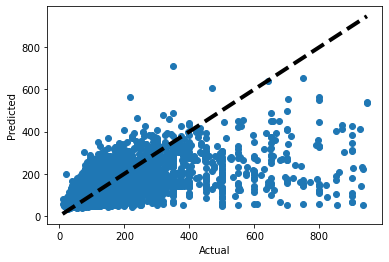

In [34]:
fig,ax = plt.subplots()
ax.scatter(np.exp(y_test), np.exp(y_pred))
ax.plot([np.exp(y_test.min()), np.exp(y_test.max())], [np.exp(y_test.min()), np.exp(y_test.max())], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
fig.show()

In [35]:
from sklearn.neighbors import KNeighborsRegressor


test_scores = []
train_scores = []


for i in range(10,40):

    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [36]:
print(train_scores)
print(test_scores)

[0.6273314807323427, 0.6221645729591108, 0.618379520203622, 0.6150268939775929, 0.6120009196635685, 0.6093000999454032, 0.607284202576853, 0.6050871429180344, 0.6035649659883542, 0.6013285490156058, 0.5997535911082849, 0.5977615445730816, 0.596038652230382, 0.5942343475221616, 0.5929146577044577, 0.5914275114877788, 0.5899330205697269, 0.5889111872927544, 0.5878280206721682, 0.5866898048711333, 0.5857113589029752, 0.5847651395256843, 0.5837676143803715, 0.5828405576750386, 0.5822772571406376, 0.5814617553464734, 0.5806746863905063, 0.5799320058030835, 0.579240336720223, 0.5783098639665962]
[0.5244224072874228, 0.5270185677863981, 0.5292595030576317, 0.5305891098703084, 0.5321531719727445, 0.5339831623829563, 0.5353046671536865, 0.5366575506045659, 0.5373421576308994, 0.5383292442968273, 0.5389422685268144, 0.5396767845806023, 0.5391871091763855, 0.5396913334263148, 0.5400437161357399, 0.5400045156691373, 0.539584035462856, 0.5401432492456941, 0.5403954291580029, 0.5411164268246036, 0.5

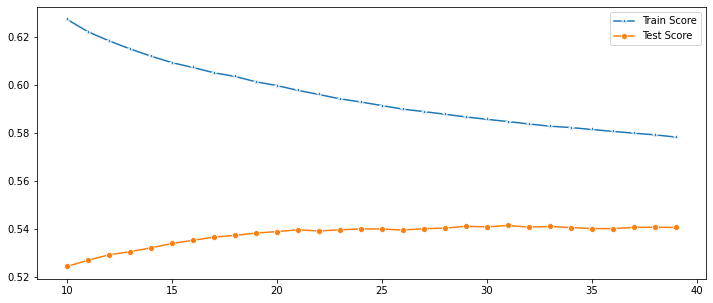

In [37]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(10,40),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(10,40),y=test_scores,marker='o',label='Test Score')

<font color='blue'>3.Random Forest Regression Along with RandomizedSearchCV</font>

In [38]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf_rs = RandomizedSearchCV(rf, random_grid, cv=5, n_iter = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 192.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   random_state=42, verbose=2)

In [40]:
rf_rs.best_params_

{'n_estimators': 322, 'max_features': 'sqrt', 'max_depth': 10}

In [41]:
rf_rs.best_score_

0.5736087794581042